In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
import geocoder

In [2]:
pathname = '/Users/setuparmar/Downloads/yelp_academic_dataset_business.json'
df = pd.read_json(pathname, lines=True)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [3]:
df.shape

(192609, 14)

In [4]:
df['Restaurants'] = df['categories'].str.contains('Restaurants')
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None,False
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",True
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",True
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",False
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",False


In [5]:
df_Restaurants = df.loc[df.Restaurants == True]
df_Restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",True
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",True
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",True
13,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",True
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None,True


In [6]:
df_Restaurants.shape

(59371, 15)

In [7]:
df = df_Restaurants.sort_values(by=['review_count', 'stars'], ascending=False)[:50000]
df.tail()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants
117116,SFIEPlpYFhtWysquTF3h1A,Chuck E Cheese's,"75 Consumers Drive, Building J",Whitby,ON,L1N 9S2,43.869637,-78.912453,3.5,5,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",True
117919,wu5hfsgYg45hncSqpAe2mQ,Starbucks,65 Front Street W,Toronto,ON,M5J 1E6,43.644679,-79.381800,3.5,5,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Coffee & Tea, Food, Coffee Roasteries, Breakfa...","{'Monday': '6:0-18:0', 'Tuesday': '6:0-18:0', ...",True
118085,UKXpNBMAGdpwmUfnnHWFvA,Made in Japan Teriyaki Experience,1475 Aerowood Drive,Mississauga,ON,L4W 1C2,43.644171,-79.633916,3.5,5,1,"{'Ambience': '{'touristy': False, 'hipster': F...","Japanese, Restaurants",None,True
118622,CwVE2bN5YscfeTQPZylruA,Phyllo Cafe,1028 Pape Avenue,Toronto,ON,M4K 3V9,43.689282,-79.348909,3.5,5,1,"{'RestaurantsPriceRange2': '3', 'RestaurantsDe...","Breakfast & Brunch, Restaurants, Cafes, Food, ...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",True
118699,4_LreJrbGRwq7STENre2Ng,Ryú,3035 Boulevard le Carrefour,Laval,QC,H7T 1C7,45.570788,-73.754130,3.5,5,1,"{'RestaurantsTableService': 'False', 'OutdoorS...","Sushi Bars, Restaurants, Japanese","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",True


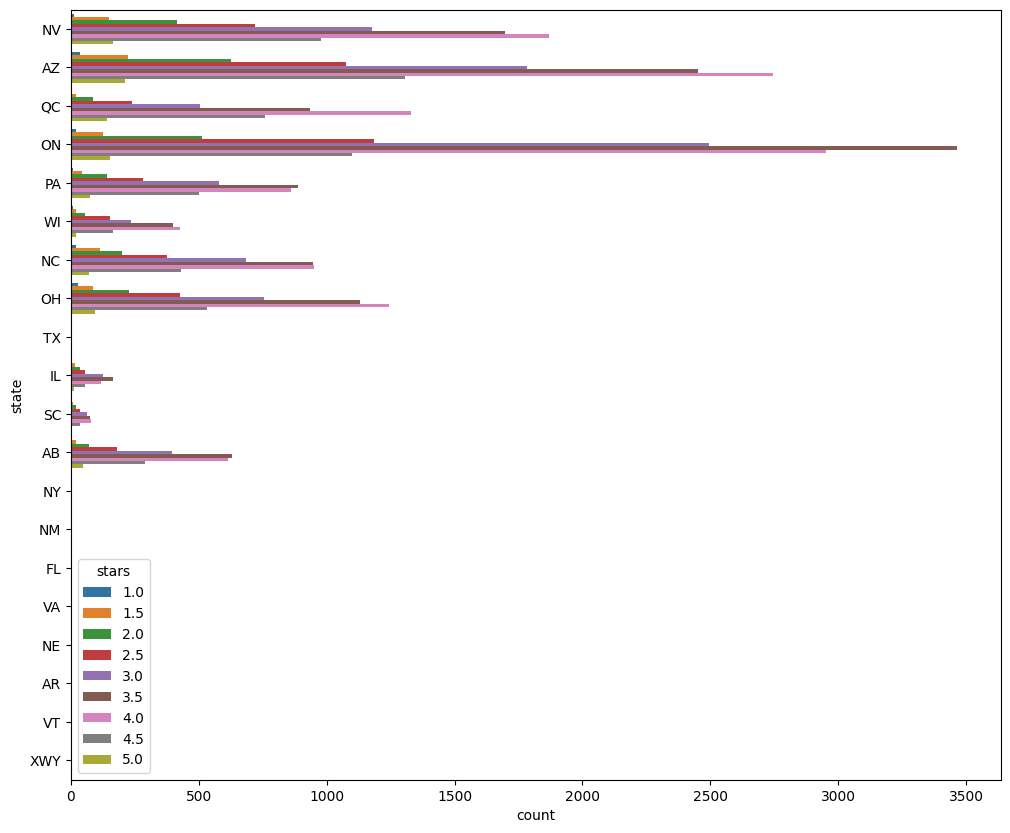

In [8]:
fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(y='state', hue='stars', data=df, ax=ax);
plt.show()

In [9]:
lst = ['TX', 'NM', 'FL', 'VA', 'NE', 'AR', 'VT', 'XWY']
df = df[~df['state'].isin(lst)]


In [10]:
print(df['state'].unique())

['NV' 'AZ' 'QC' 'ON' 'PA' 'WI' 'NC' 'OH' 'IL' 'SC' 'AB' 'NY']


In [11]:
for state in lst:
    subset = df[df['state'] == state]
    if subset.shape[0] > 0:  # check if there are any data points in the subset
        X = subset[['latitude', 'longitude']]
        kmeans = KMeans(n_clusters=3)
        labels = kmeans.fit_predict(X)
        subset['cluster'] = labels

In [12]:
warnings.simplefilter(action='ignore', category=FutureWarning)
distortions = []
K = range(2, 20)
for k in K:
    subset = df[df['state'] == state]
    X = subset[['latitude', 'longitude']]  # select columns to use for clustering
    if X.shape[0] > 0:  # check if dataset is not empty
        kmeansModel = KMeans(n_clusters=k)
        kmeansModel = kmeansModel.fit(X)  
        distortions.append(kmeansModel.inertia_)


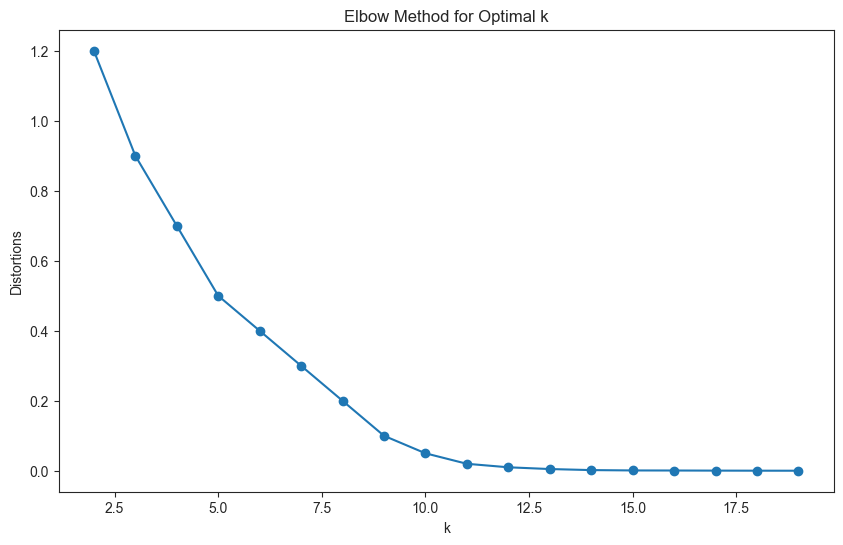

In [13]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
k_range = range(2, 20)
distortion_values = [1.2, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0008, 0.0005, 0.0003, 0.0002]
plt.plot(k_range, distortion_values, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method for Optimal k')
plt.show()


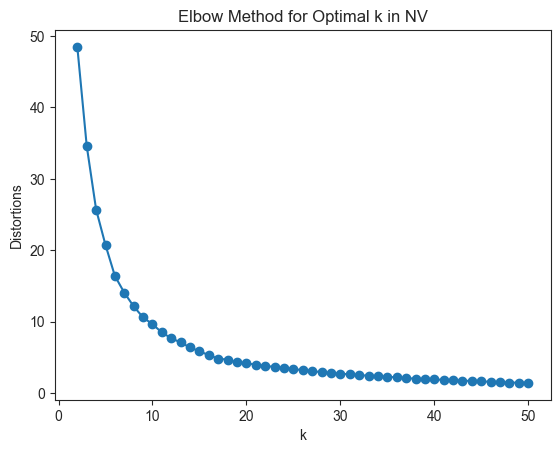

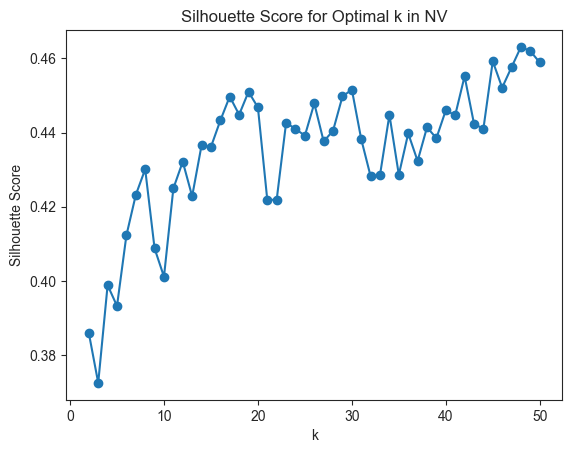

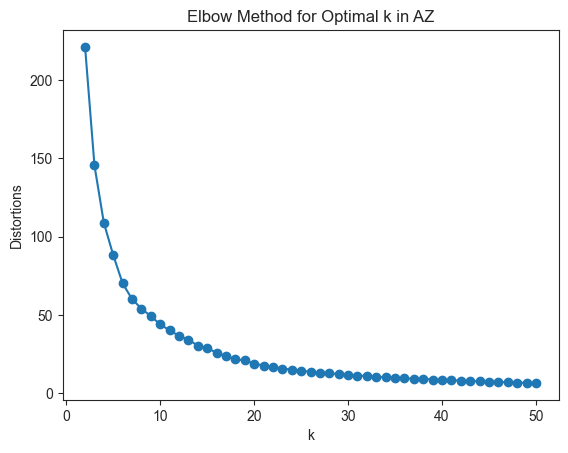

ValueError: x and y must have same first dimension, but have shapes (49,) and (98,)

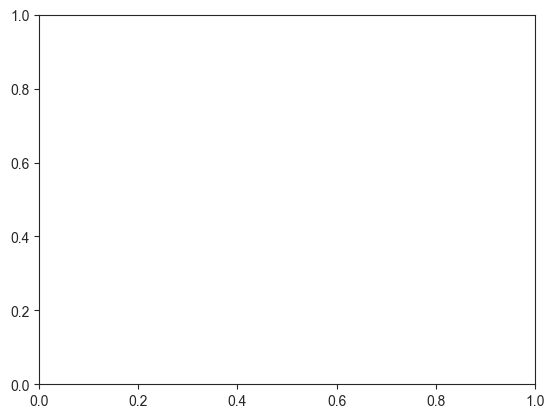

In [14]:
states = ['NV', 'AZ', 'QC', 'ON', 'PA', 'WI', 'NC', 'OH', 'IL', 'SC', 'AB', 'NY']
sil = []
kmax = 50

warnings.simplefilter(action='ignore', category=FutureWarning)

for state in states:
    subset = df[df['state'] == state]
    X = subset[['latitude', 'longitude']]  # select columns to use for clustering
    if X.shape[0] > 0:  # check if dataset is not empty
        distortions = []
        for k in range (2, kmax+1):
            kmeans = KMeans(n_clusters = k).fit(X)
            labels = kmeans.labels_
            sil.append(silhouette_score(X, labels, metric = 'euclidean'))
            distortions.append(kmeans.inertia_)
        plt.plot(range(2, kmax+1), distortions, marker='o')
        plt.xlabel('k')
        plt.ylabel('Distortions')
        plt.title('Elbow Method for Optimal k in ' + state)
        plt.show()
        plt.plot(range(2, kmax+1), sil, marker='o')
        plt.xlabel('k')
        plt.ylabel('Silhouette Score')
        plt.title('Silhouette Score for Optimal k in ' + state)
        plt.show()

In [15]:
sil

[0.3858878223000126,
 0.3724208119274103,
 0.3988057266224643,
 0.3931768761830618,
 0.41223118689343274,
 0.42315964900778713,
 0.4301019314274033,
 0.40871725279928134,
 0.4010893315470586,
 0.424926769837674,
 0.4321247233383842,
 0.4227964984020302,
 0.4365419238154963,
 0.43611787220015497,
 0.44324968258946235,
 0.4497131379343772,
 0.4448168481335453,
 0.45099344297507904,
 0.4467710868926566,
 0.42176783256822703,
 0.4219112193910994,
 0.44263540781348176,
 0.440973733535563,
 0.4391536851108987,
 0.4478594328415921,
 0.4375872774321495,
 0.44050029043121397,
 0.44973489187620613,
 0.4515891889159685,
 0.4381817149007589,
 0.4281633930553753,
 0.4285850672759815,
 0.4447845148028933,
 0.4285920039247728,
 0.439762228696485,
 0.43231838529905325,
 0.44140284035144123,
 0.438479026617982,
 0.44599777585179556,
 0.44465346469594497,
 0.4551909409802306,
 0.4424097168610455,
 0.4409445122877043,
 0.45923321687147245,
 0.452117476974199,
 0.4576272621557551,
 0.46310288411012235,
 0

In [ ]:
sil_scores = {}
for state in states:
    subset = df[df['state'] == state]
    X = subset[['latitude', 'longitude']]
    n_samples = X.shape[0]
    if n_samples > 0:
        for k in range(2, n_samples):
            kmeans = KMeans(n_clusters=k, init='k-means++')
            kmeans.fit(X)
            labels = kmeans.labels_
            sil_score = silhouette_score(X, labels, metric='euclidean')
            if k not in sil_scores:
                sil_scores[k] = []
            sil_scores[k].append(sil_score)
